In [7]:
import numpy as np
from sklearn.metrics import accuracy_score
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train , y_train),(x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [5]:
print("X_train [Shape %s]sample patch: \n"% str(x_train.shape),(x_train[1,15:20,5:10]))
print("Y_train [Shape %s]sample patch: \n"% str(y_train.shape),(y_train[0]))

X_train [Shape (60000, 28, 28)]sample patch: 
 [[  0  76 246 252 112]
 [  0  85 252 230  25]
 [  0  85 252 223   0]
 [  0  85 252 145   0]
 [  0  86 253 225   0]]
Y_train [Shape (60000,)]sample patch: 
 5


<function matplotlib.pyplot.show(close=None, block=None)>

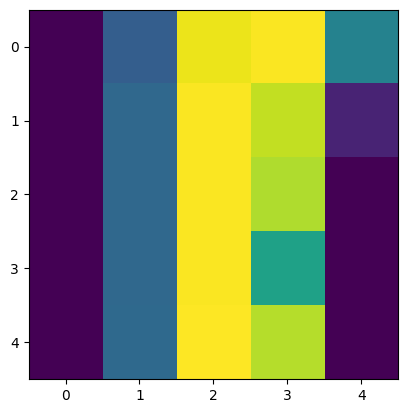

In [8]:
plt.imshow(x_train[1,15:20,5:10])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

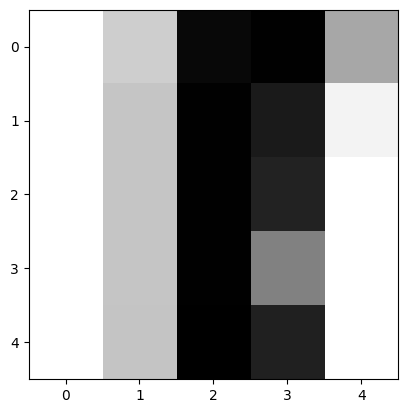

In [9]:
plt.imshow(x_train[1,15:20,5:10], cmap="Grays")
plt.show

In [ ]:
#1-normalize
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_train= x_train/255
x_test=x_test/255

In [26]:
#2-reshape
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)


In [27]:
#3- one hot encodin for y [0 - 9]
y_train_hot = tf.keras.utils.to_categorical(y_train,10)
y_test_hot = tf.keras.utils.to_categorical(y_test,10)



In [22]:
#4- sequential API , functional API
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(500,activation = tf.nn.sigmoid , input_shape=(784,)),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax) #output layer 0-9
])


c:\Users\habib\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 500)            │       392,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 397,510 (1.52 MB)

 Trainable params: 397,510 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.5),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])